<a href="https://colab.research.google.com/github/MasterDiaz410/EnsayoSVM/blob/master/Ensayo_SVM_SL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines SVM


**Hipotesis**

Para el caso linealmente separable, SVMs determina el hiperplano óptimo
que separa el conjunto de datos. Para este propósito, linealmente separable
requiere encontrar el par (w, b) tal que clasique correctamente los vectores
de ejemplos xi en dos clases yi
, es decir, para un espacio de hipótesis dado
por un conjunto de funciones fw,b = signo(wT· xi + b) se impone la siguiente
restricción:

Min
i = 1, ..., m
|w
T
· xi + b| = 1
[Fuente](http://www.dii.uchile.cl/~ris/RISXXVI/maldonado1.pdf)

**Propiedades**

*   El entrenamiento es básicamente un problema de programación
cuadrática (QP) convexa, que es atractivo por dos motivos:


> 1.   Su eficiente computación (existen paquetes software que permiten su
resolución eficientemente)
> 2.   Y la garantía de encontrar un extremo global de la superficie de error
(nunca alcanzará mínimos locales). La solución obtenida es única y la
más óptima para los datos de entrenamiento dados.

*   A la vez que minimiza el error de clasificación en el entrenamiento, maximiza el margen para mejorar la generalización del clasificador.
*   No tiene el problema de Overfitting (Sobreentrenamiento) como podría ocurrir
en las Redes Neuronales.
*   La solución no depende de la estructura del planteamiento del problema.
*   Permite trabajar con relaciones no lineales entre los datos (genera funciones no lineales, mediante kernel). El producto escalar de los vectores transformados se puede sustituir por el kernel por lo que no es necesario trabajar en el espacio extendido.
*    Generaliza muy bien con pocas muestras de entrenamiento. 
[Fuente](http://bibing.us.es/proyectos/abreproy/11185/fichero/Volumen+1_Detector+Multiusuario+para+DS-CDMA+basado+en+SVM%252F7.+Support+Vector+Machines%252FSupport+Vector+Machines.pdf)

**Aumento de la dimensión, kernels**

La dimensión de un conjunto de datos puede transformarse combinando o modificando cualquiera de sus dimensiones. Por ejemplo, se puede transformar un espacio de dos dimensiones en uno de tres aplicando la siguiente función:

f(x1,x2)=(x21,2–√x1x2,x22)

Esta es solo una de las infinitas trasformaciones posibles, ¿Cómo saber cuál es la adecuada? Es aquí donde los kernel entran en juego. Un kernel (K) es una función que devuelve el resultado del dot product entre dos vectores realizado en un nuevo espacio dimensional distinto al espacio original en el que se encuentran los vectores. Aunque no se ha entrado en detalle en las fórmulas matemáticas empleadas para resolver el problema de optimización, esta contiene un dot product. Si se sustituye este dot product por un kernel, se obtienen directamente los vectores soporte (y el hiperplano) en la dimensión correspondiente al kernel. Ha esto se le suele conocer como kernel trick, porque, con solo una ligera modificación del problema original, gracias a los kernels, se puede obtener el resultado para cualquier dimensión. Existen multitud de kernels distintos, algunos de los más utilizados son:


**Kernel lineal**

K(x,x')=x⋅x'
Si se emplea un Kernel lineal, el clasificador Support Vector Machine obtenido es equivalente al Support Vector Classifier.

**Kernel polinómico**

K(x,x')=(x⋅x'+c)d

Cuando se emplea d=1 y c=0, el resultado es el mismo que el de un kernel lineal. Si d>1, se generan límites de decisión no lineales, aumentando la no linealidad a medida que aumenta d. No suele ser recomendable emplear valores de d mayores 5 por problemas de overfitting.

**Gaussian Kernel (RBF)**

K(x,x')=exp(−γ||x−x'||2)

El valor de γ controla el comportamiento del kernel, cuando es muy pequeño, el modelo final es equivalente al obtenido con un kernel lineal, a medida que aumenta su valor, también lo hace la flexibilidad del modelo.

Los kernels descritos son solo unos pocos de los muchos que existen. Cada uno tiene una serie de hiperparámetros cuyo valor óptimo puede encontrarse mediante validación cruzada. No puede decirse que haya un kernel que supere al resto, depende en gran medida de la naturaleza del problema que se esté tratando. Ahora bien, tal como indican los autores de A Practical Guide to Support Vector Classification, es muy recomendable probar el kernel RBF. Este kernel tiene dos ventajas: que solo tiene dos hiperparámetros que optimizar (γ y la penalización C común a todos los SVM) y que su flexibilidad puede ir desde un clasificador lineal a uno muy complejo.

[Fuente](https://www.cienciadedatos.net/documentos/34_maquinas_de_vector_soporte_support_vector_machines)

# Ejemplo

In [1]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

Iniciamos generando datos a traves de data de ejemplo make_moons con una muestra de 1000 datos

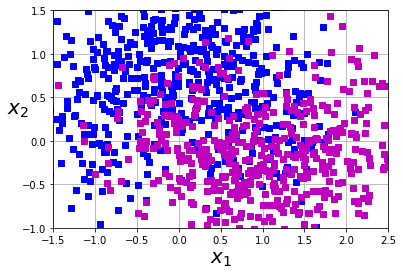

In [2]:

X, y = make_moons(n_samples=1000, noise=0.5, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "ms")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [3]:
# generamos la funcion para la prediccion de una muestra no lineal
def plot_predictions(clf, axes):

    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

In [4]:
polynomial_svm_clf = Pipeline((
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scalar", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
))
polynomial_svm_clf.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scalar',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

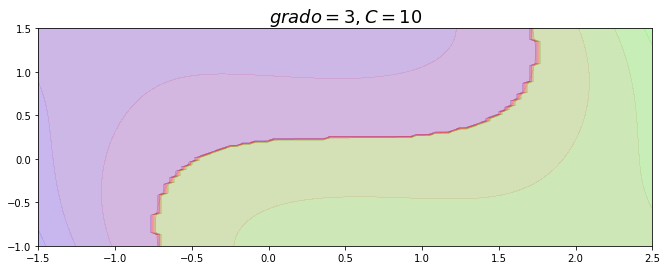

In [5]:
# vemos de forma aislada nuestra prediccion
plt.figure(figsize=(11, 4))
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plt.title(r"$grado=3, C=10$", fontsize=18)
plt.show()

Veamos como se comporta con de acuerdo al data set de entrada

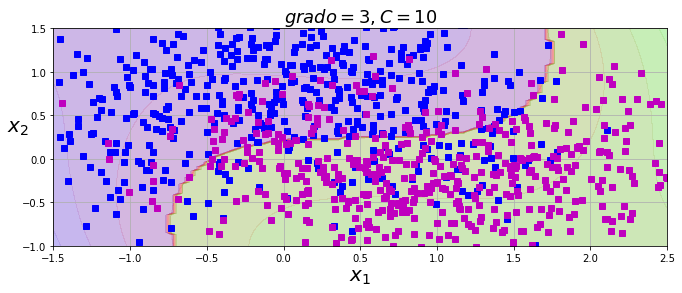

In [6]:
plt.figure(figsize=(11, 4))
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.title(r"$grado=3, C=10$", fontsize=18)
plt.show()